In [10]:
# IMPORTING THE PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# LOAD THE DATASET USING PANDAS
data = pd.read_csv("./PoductDemand.csv")

# LOAD THE FIRST FIVE VALUES
data.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [3]:
data.dropna(inplace=True)

In [4]:
X = data.drop(columns=["Units Sold"])
y = data["Units Sold"]

SPLITING THE DATA AS TESTING AND TRAINING PART:

In [5]:
# SPLITING THE DATA AS TRAINING AND TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION:
        

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data, allowing us to make predictions and understand the strength and nature of the associations between the variables.

RANDOM FOREST:
        

Random Forest is an ensemble machine learning technique that combines multiple decision trees to improve predictive accuracy and reduce overfitting, making it a powerful tool for various tasks such as classification and regression; it works by aggregating the results of numerous individual decision trees, each trained on a random subset of the data and variables, to provide more robust and reliable predictions while also allowing feature importance assessment.

In [6]:
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor()

FITTING THE LINEAR REGRESSION MODEL:

In [7]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

FITTING THE RANDOM FOREST MODEL:

In [8]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

MEAN ABSOLUTE ERROR:
    

Mean Absolute Error (MAE) in machine learning is a metric used to quantify the average magnitude of errors between predicted values and actual values in a regression problem; it calculates the absolute differences between each prediction and the corresponding true value, then averages these differences, providing a straightforward measure of the model's accuracy where smaller MAE values indicate a better fit and greater predictive precision, making it a useful tool for assessing the performance of regression algorithms.

ROOT MEAN SQUARE ERROR:

Root Mean Square Error (RMSE) is a widely used performance metric in machine learning for regression tasks that quantifies the square root of the average of the squared differences between predicted values and actual values; it provides a comprehensive measure of prediction accuracy that takes into account the magnitude of errors and penalizes larger errors more than MAE, making it a valuable tool for assessing the precision of regression models, with lower RMSE values indicating a better fit and higher predictive reliability, and it is particularly sensitive to outliers in the data, offering a robust way to evaluate a model's performance.

In [9]:
# MAKING THE PREDICTIONS
linear_reg_predictions = linear_reg_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))

print("Linear Regression MAE:", linear_reg_mae)
print("Random Forest MAE:", random_forest_mae)
print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest RMSE:", random_forest_rmse)

Linear Regression MAE: 32.48550253223134
Random Forest MAE: 17.772119547119548
Linear Regression RMSE: 52.76296754260767
Random Forest RMSE: 31.858959364333007


In [11]:
# ADDING A NEW COLUMN CALLED "TIME" TO PERFORM THE "ARIMA" OPERATION
data['Time'] = range(1, len(data) + 1)

In [12]:
# SETTING THE DATE AS INDEX
data.set_index('Time', inplace=True)

In [13]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

ARIMA ALGORITHM:

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a popular time series forecasting algorithm in machine learning that combines autoregressive, differencing, and moving average components to capture and predict underlying patterns and trends in time-series data; it involves identifying the order of differencing, autoregressive, and moving average terms to create a model capable of making future predictions, making it a powerful tool for tasks like financial forecasting, sales predictions, and more, as it accounts for seasonality and past values to provide accurate forecasts, with extensive applications in various domains where time-dependent data analysis is essential.

In [14]:
p, d, q = 1, 1, 1 
model = ARIMA(train['Units Sold'], order=(p, d, q))
model_fit = model.fit()

c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
start_index = len(train)
end_index = start_index + len(test) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


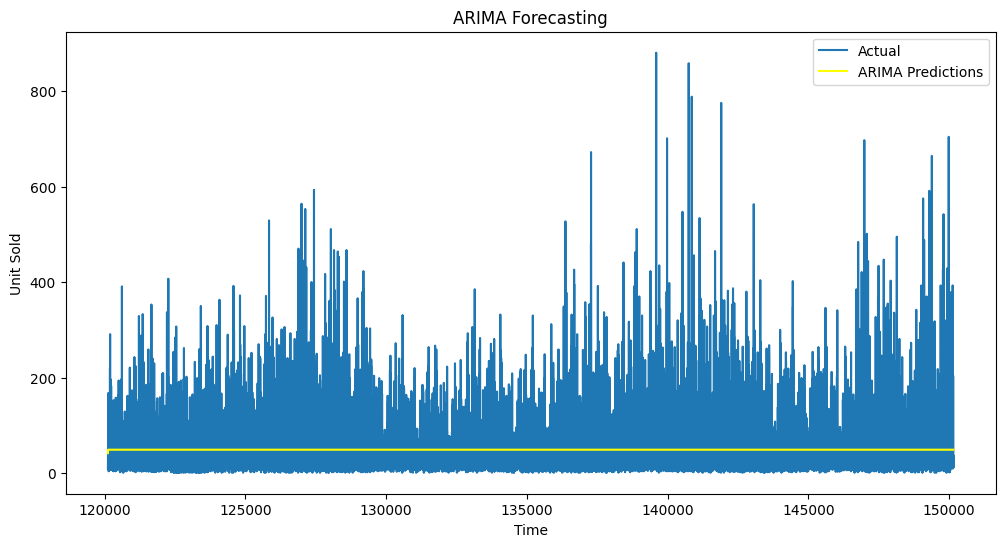

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Units Sold'], label='Actual')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='yellow')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Unit Sold')
plt.show()